## Mario Yahir García Hernández
## Oscar Correa Saenz
## Ricardo Aguilar Hernández

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist


In [ ]:
# Cargar los datos MNIST
(x_train, _), (x_test, _) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:


# Normalizar los valores de píxeles entre 0 y 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Aplanar las imágenes de 28x28 a vectores de 784 dimensiones
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
# Tamaño de nuestra codificación (número de neuronas en la capa oculta)
encoding_dim = 8

# Definir la entrada
input_img = Input(shape=(784,))

# "Encodificador" (Encoder)
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "Decodificador" (Decoder)
decoded = Dense(784, activation='sigmoid')(encoded)

# Modelo completo del autoencoder
autoencoder = Model(input_img, decoded)


In [ ]:
# Este modelo mapea una imagen de entrada a su representación codificada
encoder = Model(input_img, encoded)


In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4586 - val_loss: 0.2503
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2366 - val_loss: 0.2067
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2029 - val_loss: 0.1894
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1885 - val_loss: 0.1818
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1817 - val_loss: 0.1787
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1795 - val_loss: 0.1767
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1776 - val_loss: 0.1752
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1760 - val_loss: 0.1740
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1749 - val_loss: 0.1728
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1737 - val_loss: 0.1718
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1730 - val_loss: 0.1709
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


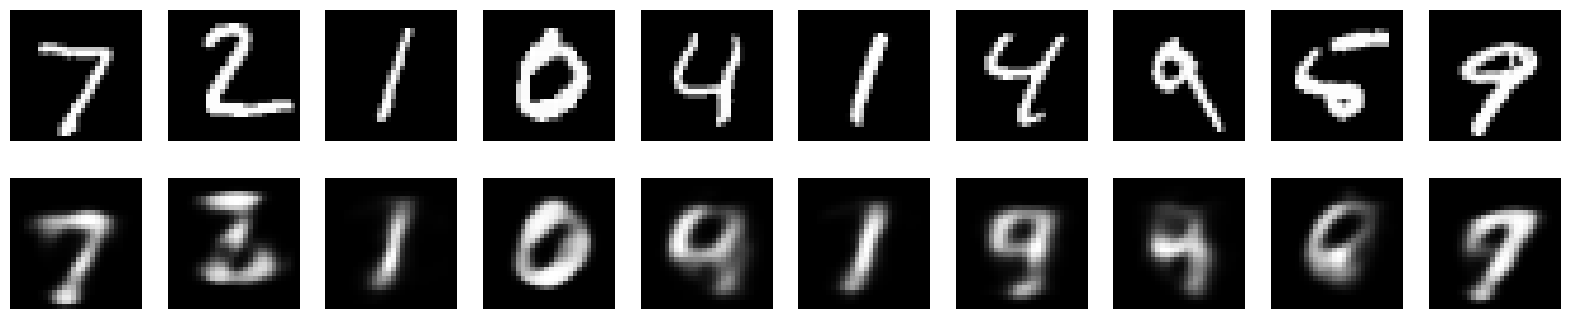

In [ ]:
# Codificar y decodificar algunas imágenes del conjunto de prueba
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Visualizar las imágenes originales y las reconstruidas
n = 10  # Número de dígitos a mostrar
plt.figure(figsize=(20, 4))
for i in range(n):
    # Mostrar imágenes originales
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Mostrar imágenes reconstruidas
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


## Ejercicio 1: Modificar la Dimensión de Codificación

**Objetivo**: Explorar cómo afecta la dimensión de codificación (`encoding_dim`) al rendimiento del autoencoder.

**Instrucciones**:

- Modifica el valor de `encoding_dim` a 16, 64 y 128.
- Entrena el autoencoder con estos nuevos valores.
- Compara las imágenes reconstruidas con las obtenidas originalmente con `encoding_dim = 32`.
- Analiza cómo cambia la calidad de la reconstrucción al variar la dimensión de codificación.


(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3150 - val_loss: 0.1352
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1257 - val_loss: 0.1022
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0995 - val_loss: 0.0888
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0877 - val_loss: 0.0814
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0811 - val_loss: 0.0771
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0769 - val_loss: 0.0742
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0743 - val_loss: 0.0724
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0726 - val_loss: 0.0710
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0713 - val_loss: 0.0701
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0704 - val_loss: 0.0693
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0695 - val_loss: 0

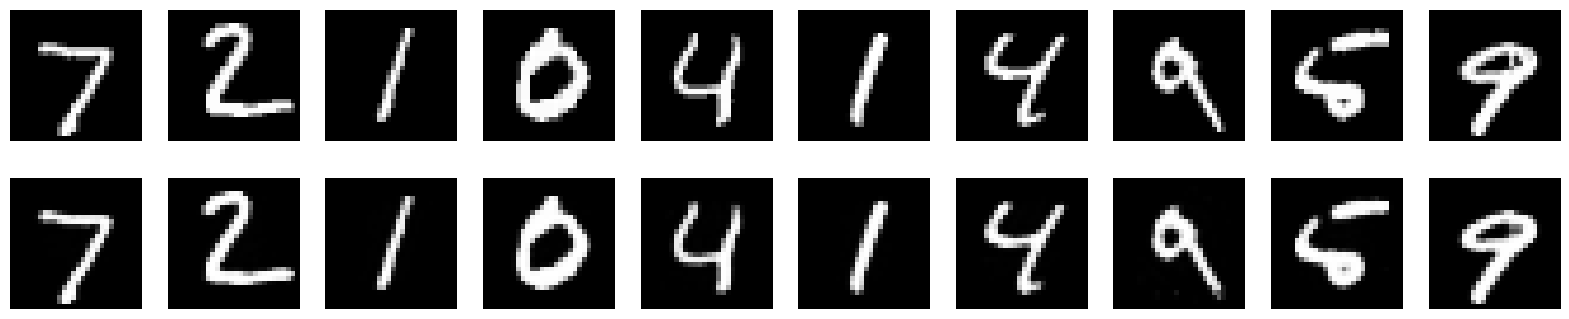

In [ ]:
# Cargar los datos MNIST
(x_train, _), (x_test, _) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

# Normalizar los valores de píxeles entre 0 y 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Aplanar las imágenes de 28x28 a vectores de 784 dimensiones
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

# Tamaño de nuestra codificación (número de neuronas en la capa oculta)
encoding_dim = 128

# Definir la entrada
input_img = Input(shape=(784,))

# "Encodificador" (Encoder)
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "Decodificador" (Decoder)
decoded = Dense(784, activation='sigmoid')(encoded)

# Modelo completo del autoencoder
autoencoder = Model(input_img, decoded)

# Este modelo mapea una imagen de entrada a su representación codificada
encoder = Model(input_img, encoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Codificar y decodificar algunas imágenes del conjunto de prueba
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Visualizar las imágenes originales y las reconstruidas
n = 10  # Número de dígitos a mostrar
plt.figure(figsize=(20, 4))
for i in range(n):
    # Mostrar imágenes originales
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Mostrar imágenes reconstruidas
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()



## Ejercicio 2: Implementar un Autoencoder Denoising

**Objetivo**: Aprender a eliminar ruido de las imágenes utilizando un autoencoder.

**Instrucciones**:

- Añade ruido gaussiano a las imágenes de entrenamiento y prueba.
- Entrena el autoencoder utilizando las imágenes ruidosas como entrada y las imágenes originales como salida.
- Visualiza cómo el autoencoder es capaz de eliminar el ruido de las imágenes de prueba.

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3154 - val_loss: 0.1648
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1576 - val_loss: 0.1386
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1366 - val_loss: 0.1279
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1270 - val_loss: 0.1217
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1215 - val_loss: 0.1183
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1180 - val_loss: 0.1162
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1159 - val_loss: 0.1148
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1142 - val_loss: 0.1136
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1131 - val_loss: 0.1128
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1125 - val_loss: 0.1118
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1114 - val_loss: 0

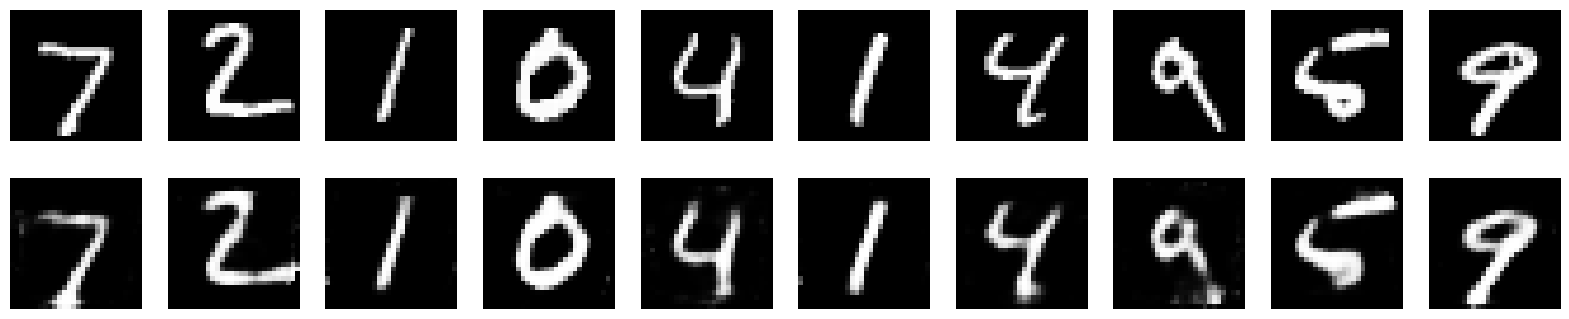

In [ ]:
# Cargar los datos MNIST
(x_train, _), (x_test, _) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

# Normalizar los valores de píxeles entre 0 y 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Aplanar las imágenes de 28x28 a vectores de 784 dimensiones
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Agregar ruido a las imágenes
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(x_train.shape)
print(x_test.shape)

# Tamaño de nuestra codificación (número de neuronas en la capa oculta)
encoding_dim = 128

# Definir la entrada
input_img = Input(shape=(784,))

# "Encodificador" (Encoder)
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "Decodificador" (Decoder)
decoded = Dense(784, activation='sigmoid')(encoded)

# Modelo completo del autoencoder
autoencoder = Model(input_img, decoded)

# Este modelo mapea una imagen de entrada a su representación codificada
encoder = Model(input_img, encoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Codificar y decodificar algunas imágenes del conjunto de prueba
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Visualizar las imágenes originales y las reconstruidas
n = 10  # Número de dígitos a mostrar
plt.figure(figsize=(20, 4))
for i in range(n):
    # Mostrar imágenes originales
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Mostrar imágenes reconstruidas
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

## Ejercicio 3: Utilizar un Autoencoder Convolucional

**Objetivo**: Implementar un autoencoder utilizando capas convolucionales para mejorar el rendimiento en datos de imagen.

**Instrucciones**:

- Reestructura los datos de entrada para mantener las dimensiones espaciales (28x28x1).
- Construye un autoencoder utilizando capas convolucionales (`Conv2D` y `Conv2DTranspose`).
- Entrena el nuevo modelo y compara los resultados con el autoencoder completamente conectado.

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - loss: 0.3001 - val_loss: 0.1693
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.1632 - val_loss: 0.1564
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.1558 - val_loss: 0.1533
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.1511 - val_loss: 0.1421
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 0.1406 - val_loss: 0.1380
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.1369 - val_loss: 0.1358
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.1351 - val_loss: 0.1338
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.1339 - val_loss: 0.1304
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.1266 - val_loss: 0.1238
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1224 - val_loss: 0.1223
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.1211 - val_loss: 0.1211
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━

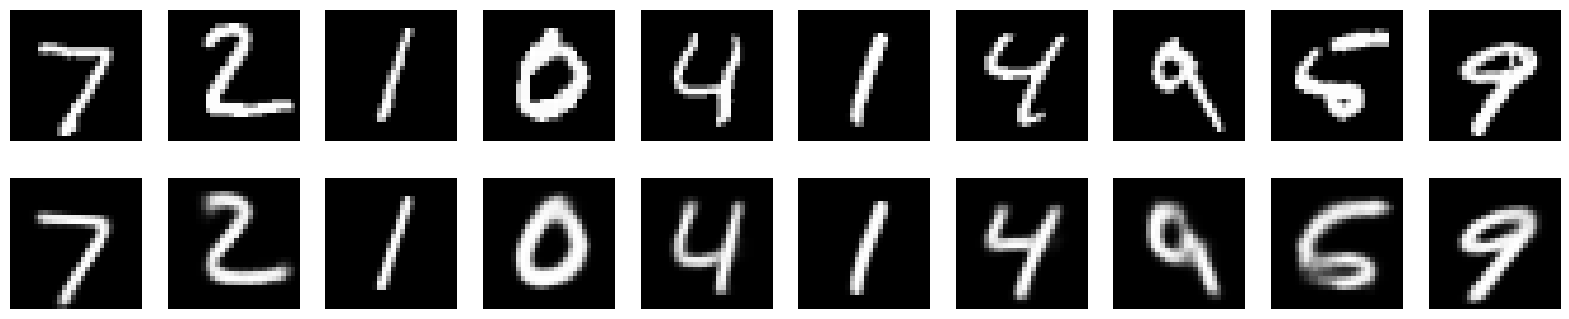

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Flatten, Reshape, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

# Cargar los datos MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizar los valores de píxeles entre 0 y 1 y darles forma de (28, 28, 1)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Dimensión del espacio latente
latent_dim = 16

# Encoder: definimos el input y las capas convolucionales
input_img = Input(shape=(28, 28, 1))

# Construcción del encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
shape_before_flattening = K.int_shape(x)
x = Flatten()(x)
encoded = Dense(latent_dim, activation='relu')(x)

# Decoder: definimos las capas convolucionales transpuestas para reconstrucción
decoder_input = Input(shape=(latent_dim,))
x = Dense(np.prod(shape_before_flattening[1:]), activation='relu')(decoder_input)
x = Reshape(shape_before_flattening[1:])(x)
x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
decoded = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

# Modelos del autoencoder completo y del encoder
encoder = Model(input_img, encoded)
decoder = Model(decoder_input, decoded)
autoencoder = Model(input_img, decoder(encoder(input_img)))

# Compilación del modelo
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Entrenamiento del modelo
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

# Evaluar los resultados reconstruyendo imágenes del conjunto de prueba
decoded_imgs = autoencoder.predict(x_test)

# Visualizar algunas de las imágenes originales y sus reconstrucciones
n = 10  # Número de dígitos a mostrar
plt.figure(figsize=(20, 4))
for i in range(n):
    # Mostrar imágenes originales
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Mostrar imágenes reconstruidas
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


## Ejercicio 4: Visualizar el Espacio Latente

**Objetivo**: Entender cómo se representan los datos en el espacio latente del autoencoder.

**Instrucciones**:

- Utiliza el modelo de codificador para obtener las representaciones latentes de las imágenes de prueba.
- Reduce las dimensiones de las representaciones latentes a 2 usando PCA o t-SNE.
- Genera un gráfico de dispersión (scatter plot) de estas representaciones, coloreando cada punto según la etiqueta del dígito.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


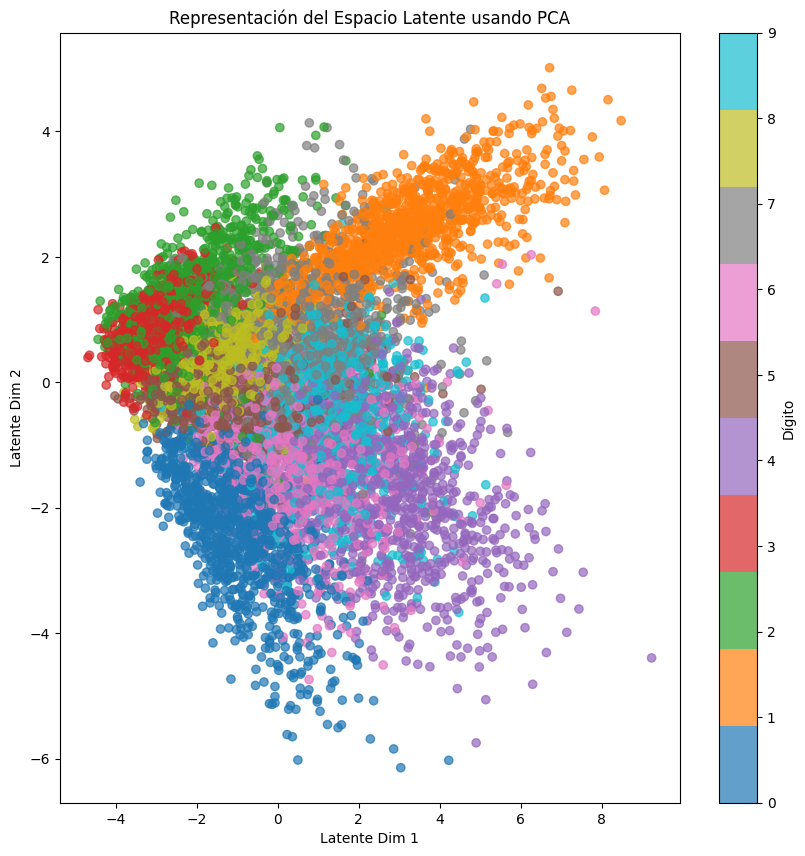

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Cargar los datos MNIST, incluyendo las etiquetas
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar los valores de píxeles entre 0 y 1 y darles forma de (28, 28, 1)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Utilizar el modelo de codificador previamente definido para obtener las representaciones latentes
# Asegúrate de que `encoder` esté definido en el entorno (ver el ejercicio previo)
latent_representations = encoder.predict(x_test)

# Reducir las dimensiones a 2D usando PCA o t-SNE
# Opción 1: Usar PCA
pca = PCA(n_components=2)
latent_2d_pca = pca.fit_transform(latent_representations)

# Opción 2: Usar t-SNE (puede ser más lento pero captura mejor la estructura no lineal)
# tsne = TSNE(n_components=2)
# latent_2d_tsne = tsne.fit_transform(latent_representations)

# Generar gráfico de dispersión con PCA
plt.figure(figsize=(10, 10))
scatter = plt.scatter(latent_2d_pca[:, 0], latent_2d_pca[:, 1], c=y_test, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, ticks=range(10), label='Dígito')
plt.xlabel("Latente Dim 1")
plt.ylabel("Latente Dim 2")
plt.title("Representación del Espacio Latente usando PCA")
plt.show()


## Ejercicio 5: Clasificación Basada en el Espacio Latente

**Objetivo**: Evaluar si las representaciones latentes pueden ser utilizadas para tareas de clasificación.

**Instrucciones**:

- Entrena un clasificador simple (por ejemplo, una regresión logística o un SVM) utilizando las representaciones latentes como características y las etiquetas de los dígitos como objetivos.
- Compara el rendimiento del clasificador con uno entrenado directamente sobre los píxeles de las imágenes.

In [20]:
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Cargar los datos MNIST, incluyendo las etiquetas
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar los valores de píxeles entre 0 y 1 y darles forma de (28, 28, 1)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Utilizar el modelo de codificador previamente definido para obtener las representaciones latentes
# Asegúrate de que `encoder` esté definido en el entorno (ver el ejercicio previo)
latent_train = encoder.predict(x_train)
latent_test = encoder.predict(x_test)

# Entrenar un clasificador en el espacio latente
# Clasificador 1: Regresión Logística
clf_latent_lr = LogisticRegression(max_iter=1000)
clf_latent_lr.fit(latent_train, y_train)
latent_pred_lr = clf_latent_lr.predict(latent_test)
accuracy_latent_lr = accuracy_score(y_test, latent_pred_lr)

# Clasificador 2: SVM
clf_latent_svm = SVC()
clf_latent_svm.fit(latent_train, y_train)
latent_pred_svm = clf_latent_svm.predict(latent_test)
accuracy_latent_svm = accuracy_score(y_test, latent_pred_svm)

# Entrenar un clasificador directamente sobre los píxeles de las imágenes
# Redimensionar las imágenes de entrada a un vector de 784 dimensiones
x_train_flat = x_train.reshape(len(x_train), -1)
x_test_flat = x_test.reshape(len(x_test), -1)

# Clasificador 1: Regresión Logística en el espacio de píxeles
clf_pixels_lr = LogisticRegression(max_iter=1000)
clf_pixels_lr.fit(x_train_flat, y_train)
pixels_pred_lr = clf_pixels_lr.predict(x_test_flat)
accuracy_pixels_lr = accuracy_score(y_test, pixels_pred_lr)

# Clasificador 2: SVM en el espacio de píxeles
clf_pixels_svm = SVC()
clf_pixels_svm.fit(x_train_flat, y_train)
pixels_pred_svm = clf_pixels_svm.predict(x_test_flat)
accuracy_pixels_svm = accuracy_score(y_test, pixels_pred_svm)

# Comparación de resultados
print("Accuracy con regresión logística en el espacio latente:", accuracy_latent_lr)
print("Accuracy con SVM en el espacio latente:", accuracy_latent_svm)
print("Accuracy con regresión logística en el espacio de píxeles:", accuracy_pixels_lr)
print("Accuracy con SVM en el espacio de píxeles:", accuracy_pixels_svm)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy con regresión logística en el espacio latente: 0.9528
Accuracy con SVM en el espacio latente: 0.9643
Accuracy con regresión logística en el espacio de píxeles: 0.9255
Accuracy con SVM en el espacio de píxeles: 0.9792


## Ejercicio 6: Crear un Variational Autoencoder (VAE) Simple

**Objetivo**: Introducir los conceptos básicos de los autoencoders variacionales.

**Instrucciones**:

- Modifica el modelo del autoencoder para convertirlo en un VAE.
- Implementa las capas de muestreo y la función de pérdida personalizada que incluye el término de regularización Kullback-Leibler.
- Entrena el VAE y genera nuevas imágenes muestreando del espacio latente.


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 101.6570 - val_loss: 65.0938
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 64.1381 - val_loss: 59.9493
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 59.7791 - val_loss: 58.3228
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 58.3974 - val_loss: 57.5663
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 57.5468 - val_loss: 57.1968
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 57.2020 - val_loss: 56.8438
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 56.8994 - val_loss: 56.6037
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 56.5344 - val_loss: 56.2948
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 56.2506 - val_loss: 56.0889
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 55.8915 - val_loss: 55.8688
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55.7481 - val_loss: 55.7650
Epoch 12/50
235/235 ━━━━━━━━

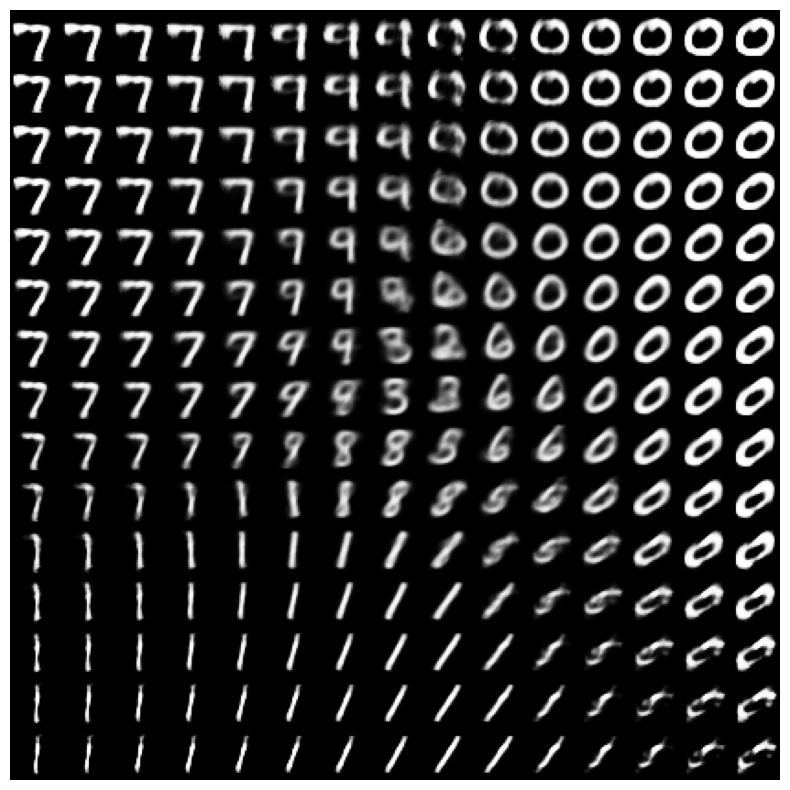

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Lambda, Layer
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import tensorflow as tf

# Cargar los datos MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizar los valores de píxeles entre 0 y 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Aplanar las imágenes de 28x28 a vectores de 784 dimensiones
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
input_dim = x_train.shape[1]

# Dimensiones del espacio latente y entrada
latent_dim = 2  # Dimensión del espacio latente

# Función de muestreo para la capa de latente
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Definir la entrada
input_img = Input(shape=(input_dim,))

# Encoder: generar media y log-varianza
h = Dense(256, activation='relu')(input_img)
z_mean = Dense(latent_dim, name='z_mean')(h)
z_log_var = Dense(latent_dim, name='z_log_var')(h)

# Muestreo de la capa latente
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# Decoder: mapeo del espacio latente al espacio de salida
decoder_h = Dense(256, activation='relu')
decoder_mean = Dense(input_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# Definir una capa personalizada para la pérdida VAE
class VAELossLayer(Layer):
    def call(self, inputs):
        input_img, x_decoded_mean, z_mean, z_log_var = inputs
        reconstruction_loss = tf.reduce_sum(
            tf.keras.losses.binary_crossentropy(input_img, x_decoded_mean), axis=-1
        )
        kl_loss = -0.5 * tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1)
        total_loss = K.mean(reconstruction_loss + kl_loss)
        self.add_loss(total_loss)
        return x_decoded_mean

# Añadir la capa de pérdida personalizada
outputs = VAELossLayer()([input_img, x_decoded_mean, z_mean, z_log_var])

# Modelo VAE completo
vae = Model(input_img, outputs)
vae.compile(optimizer='adam')

# Entrenar el VAE
vae.fit(x_train, epochs=50, batch_size=256, validation_data=(x_test, None))

# Generar nuevas imágenes a partir del espacio latente
# Definir un modelo separado para el generador
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

# Visualizar las imágenes generadas
n = 15  # Número de imágenes a generar por fila
figure = np.zeros((28 * n, 28 * n))

# Muestreo del espacio latente en una cuadrícula de coordenadas
grid_x = np.linspace(-4, 4, n)
grid_y = np.linspace(-4, 4, n)[::-1]

for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi]])
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(28, 28)
        figure[i * 28: (i + 1) * 28,
               j * 28: (j + 1) * 28] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.axis('off')
plt.show()


## Ejercicio 7: Compresión de Imágenes con Autoencoders

**Objetivo**: Utilizar el autoencoder para comprimir y descomprimir imágenes.

**Instrucciones**:

- Guarda las representaciones latentes (codificaciones) de las imágenes de prueba.
- Calcula el tamaño de almacenamiento requerido para las codificaciones en comparación con las imágenes originales.
- Discute la eficiencia de compresión y la calidad de las imágenes reconstruidas.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.3146 - val_loss: 0.1354
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1261 - val_loss: 0.1026
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0996 - val_loss: 0.0888
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0877 - val_loss: 0.0812
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0808 - val_loss: 0.0768
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0768 - val_loss: 0.0741
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0741 - val_loss: 0.0723
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0725 - val_loss: 0.0710
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0712 - val_loss: 0.0700
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0703 - val_loss: 0.0693
Epoch 11/50
235/235 ━━━━━━━━━

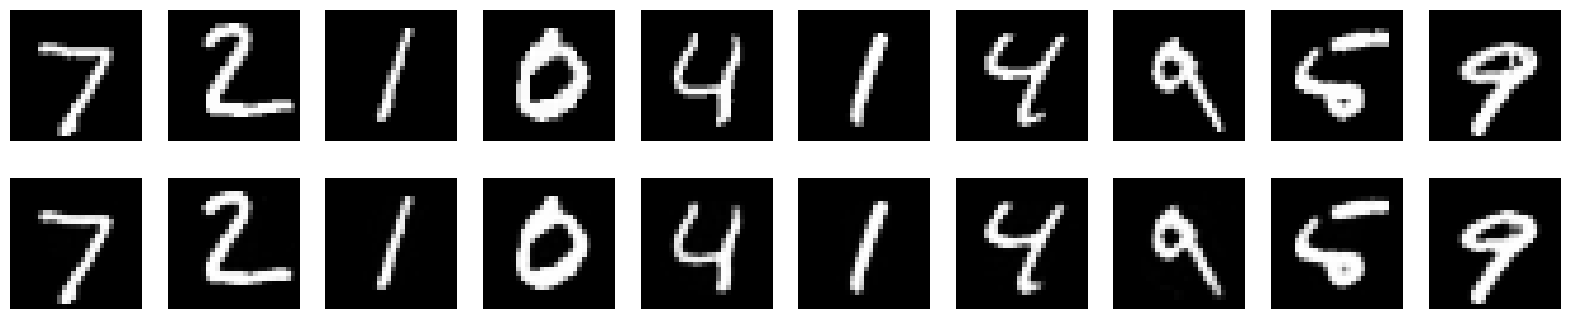

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Cargar los datos MNIST
(x_train, _), (x_test, _) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

# Normalizar los valores de píxeles entre 0 y 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Aplanar las imágenes de 28x28 a vectores de 784 dimensiones
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

# Tamaño de nuestra codificación (número de neuronas en la capa oculta)
encoding_dim = 128

# Definir la entrada
input_img = Input(shape=(784,))

# "Encodificador" (Encoder)
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "Decodificador" (Decoder)
decoded = Dense(784, activation='sigmoid')(encoded)

# Modelo completo del autoencoder
autoencoder = Model(input_img, decoded)

# Este modelo mapea una imagen de entrada a su representación codificada
encoder = Model(input_img, encoded)

# Compilar el modelo
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Entrenar el autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Codificar y decodificar algunas imágenes del conjunto de prueba
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Paso 1: Generar las representaciones latentes (ya está hecho)
encoded_imgs = encoder.predict(x_test)

# Paso 2: Calcular el tamaño de almacenamiento
size_original = x_test[0].nbytes
size_encoded = encoded_imgs[0].nbytes
total_size_original = size_original * len(x_test)
total_size_encoded = size_encoded * len(encoded_imgs)

print(f"Tamaño total de las imágenes originales: {total_size_original / (1024 ** 2):.2f} MB")
print(f"Tamaño total de las codificaciones: {total_size_encoded / (1024 ** 2):.2f} MB")

# Paso 3: Calcular la eficiencia de compresión
compression_ratio = total_size_original / total_size_encoded
print(f"Eficiencia de compresión: {compression_ratio:.2f}")

# Visualización de la calidad de las imágenes reconstruidas
n = 10  # Número de dígitos a mostrar
plt.figure(figsize=(20, 4))
for i in range(n):
    # Mostrar imágenes originales
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Mostrar imágenes reconstruidas
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


## Ejercicio 8: Explorar Diferentes Funciones de Activación y Optimización

**Objetivo**: Investigar cómo afectan diferentes funciones de activación y optimizadores al rendimiento del autoencoder.

**Instrucciones**:

- Prueba diferentes funciones de activación como `tanh`, `relu` y `leaky_relu`.
- Experimenta con optimizadores como `SGD`, `RMSprop` y `Adamax`.
- Analiza el impacto en la velocidad de convergencia y en la calidad de reconstrucción.

Entrenando con activación relu y optimizador SGD...
Final validation loss: 0.3416568338871002
Entrenando con activación relu y optimizador RMSprop...
Final validation loss: 0.08169881254434586
Entrenando con activación relu y optimizador Adamax...
Final validation loss: 0.06909319758415222
Entrenando con activación tanh y optimizador SGD...
Final validation loss: 0.44748350977897644
Entrenando con activación tanh y optimizador RMSprop...
Final validation loss: 0.1371917426586151
Entrenando con activación tanh y optimizador Adamax...
Final validation loss: 0.08901152014732361
Entrenando con activación leaky_relu y optimizador SGD...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Final validation loss: 0.3296365737915039
Entrenando con activación leaky_relu y optimizador RMSprop...
Final validation loss: 0.08159621804952621
Entrenando con activación leaky_relu y optimizador Adamax...
Final validation loss: 0.0692022517323494


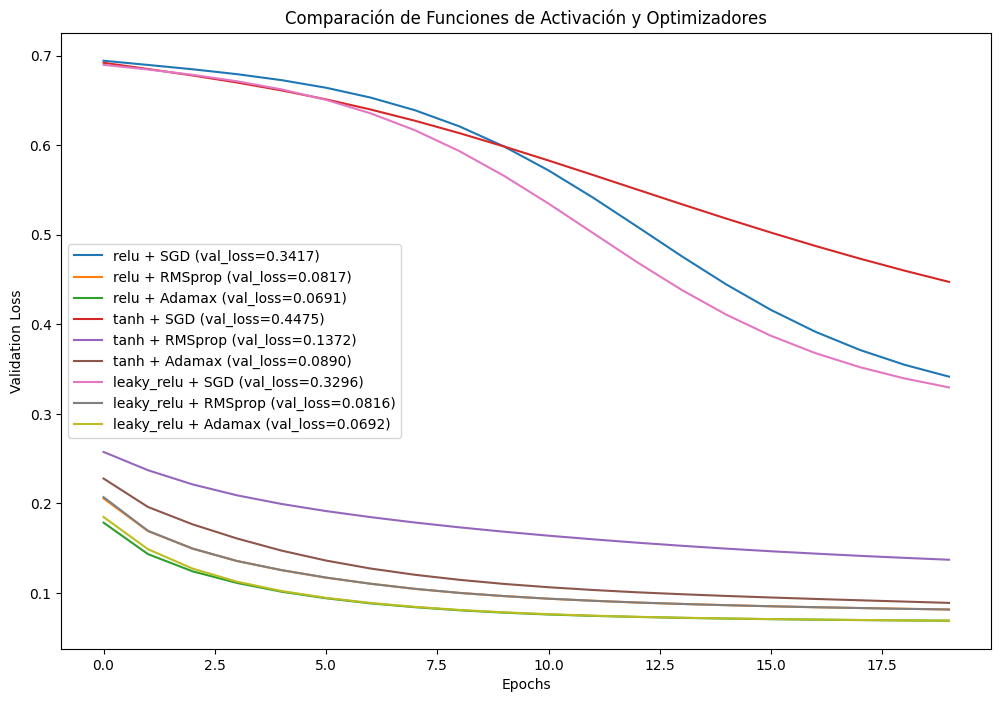


Visualización de reconstrucción para activación relu y optimizador Adamax
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


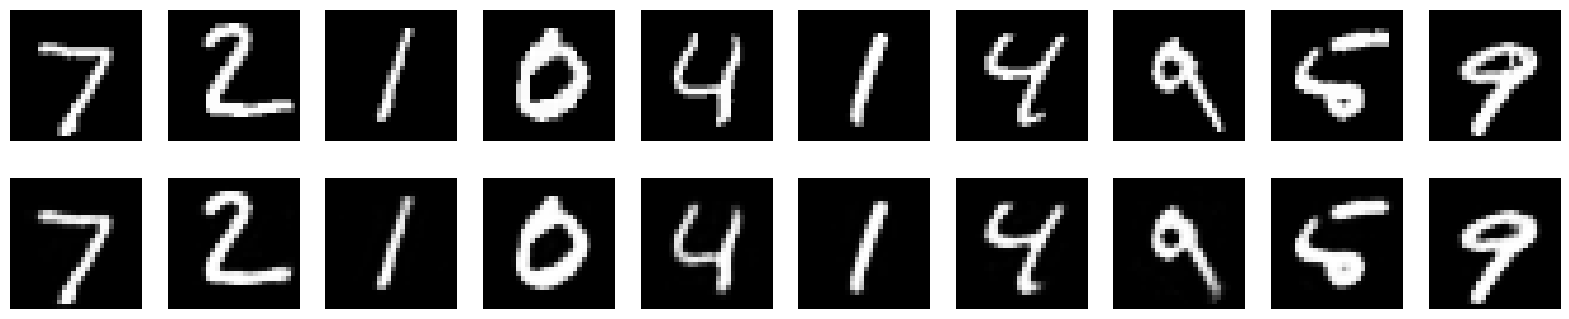

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, RMSprop, Adamax
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.activations import relu, tanh
from tensorflow.keras import backend as K
from tensorflow.keras.layers import LeakyReLU

# Cargar los datos MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizar los valores de píxeles entre 0 y 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Aplanar las imágenes de 28x28 a vectores de 784 dimensiones
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Definir hiperparámetros y combinaciones para probar
encoding_dim = 128  # Tamaño de nuestra codificación
activation_functions = ['relu', 'tanh', 'leaky_relu']  # Funciones de activación
optimizer_classes = [SGD, RMSprop, Adamax]  # Clases de optimización

# Función para construir y entrenar el autoencoder con activación y optimizador específicos
def build_and_train_autoencoder(activation, optimizer_class):
    # Crear una nueva instancia del optimizador para cada modelo
    optimizer = optimizer_class()

    # Definir la entrada
    input_img = Input(shape=(784,))

    # Construir el "Encoder" y "Decoder" con la activación especificada
    if activation == 'leaky_relu':
        encoded = Dense(encoding_dim)(input_img)
        encoded = LeakyReLU(alpha=0.1)(encoded)
    else:
        encoded = Dense(encoding_dim, activation=activation)(input_img)

    decoded = Dense(784, activation='sigmoid')(encoded)

    # Modelo completo del autoencoder
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')

    # Entrenar el autoencoder
    history = autoencoder.fit(x_train, x_train,
                              epochs=20,
                              batch_size=256,
                              shuffle=True,
                              validation_data=(x_test, x_test),
                              verbose=0)  # Reduce salida de entrenamiento

    # Guardar la pérdida de validación final y el historial de entrenamiento
    final_val_loss = history.history['val_loss'][-1]
    return final_val_loss, history

# Probar todas las combinaciones de activaciones y optimizadores
results = {}
for activation in activation_functions:
    for optimizer_class in optimizer_classes:
        optimizer_name = optimizer_class.__name__
        print(f"Entrenando con activación {activation} y optimizador {optimizer_name}...")
        final_val_loss, history = build_and_train_autoencoder(activation, optimizer_class)
        results[(activation, optimizer_name)] = (final_val_loss, history)
        print(f"Final validation loss: {final_val_loss}")

# Visualizar resultados
plt.figure(figsize=(12, 8))
for (activation, optimizer_name), (final_val_loss, history) in results.items():
    plt.plot(history.history['val_loss'], label=f"{activation} + {optimizer_name} (val_loss={final_val_loss:.4f})")

plt.title('Comparación de Funciones de Activación y Optimizadores')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Visualización de la reconstrucción para una combinación específica (ejemplo: ReLU y Adamax)
selected_activation = 'relu'
selected_optimizer = Adamax
print(f"\nVisualización de reconstrucción para activación {selected_activation} y optimizador {selected_optimizer.__name__}")

# Reconstruir el modelo con los parámetros seleccionados para ver las imágenes
final_val_loss, history = build_and_train_autoencoder(selected_activation, selected_optimizer)

# Generar las imágenes reconstruidas
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation=selected_activation)(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=selected_optimizer(), loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test), verbose=0)
decoded_imgs = autoencoder.predict(x_test)

# Visualizar las imágenes originales y reconstruidas
n = 10  # Número de dígitos a mostrar
plt.figure(figsize=(20, 4))
for i in range(n):
    # Mostrar imágenes originales
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Mostrar imágenes reconstruidas
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


## Ejercicio 9: Detectar Anomalías con Autoencoders

**Objetivo**: Utilizar el autoencoder para detectar imágenes anómalas en el conjunto de datos.

**Instrucciones**:

- Introduce algunas imágenes que no pertenecen al conjunto MNIST (por ejemplo, imágenes de moda o ruido aleatorio) en el conjunto de prueba.
- Calcula el error de reconstrucción para cada imagen de prueba.
- Identifica las imágenes con mayor error de reconstrucción y analiza si corresponden a las imágenes anómalas.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.3852 - val_loss: 0.1908
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1807 - val_loss: 0.1531
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1488 - val_loss: 0.1339
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1321 - val_loss: 0.1217
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1204 - val_loss: 0.1127
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1122 - val_loss: 0.1064
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1064 - val_loss: 0.1021
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1025 - val_loss: 0.0988
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0995 - val_loss: 0.0967
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


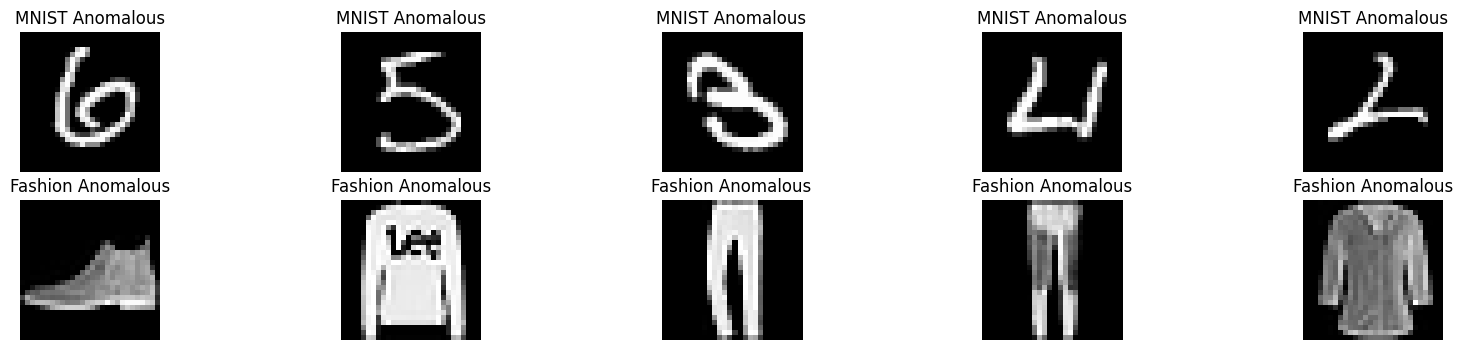

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.losses import MeanSquaredError

# Cargar los datos MNIST y Fashion MNIST
(x_train, _), (x_test, _) = mnist.load_data()
(_, _), (x_test_fashion, _) = fashion_mnist.load_data()

# Normalizar los valores de píxeles entre 0 y 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_test_fashion = x_test_fashion.astype('float32') / 255.

# Aplanar las imágenes de 28x28 a vectores de 784 dimensiones
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_test_fashion = x_test_fashion.reshape((len(x_test_fashion), np.prod(x_test_fashion.shape[1:])))

# Tamaño de nuestra codificación (número de neuronas en la capa oculta)
encoding_dim = 32

# Definir la entrada
input_img = Input(shape=(784,))

# "Encodificador" (Encoder)
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "Decodificador" (Decoder)
decoded = Dense(784, activation='sigmoid')(encoded)

# Modelo completo del autoencoder
autoencoder = Model(input_img, decoded)

# Este modelo mapea una imagen de entrada a su representación codificada
encoder = Model(input_img, encoded)

# Compilar el modelo
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Entrenar el autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Función para calcular el error de reconstrucción
def calculate_reconstruction_error(original, decoded):
    mse = MeanSquaredError()
    return mse(original, decoded).numpy()

# Codificar y decodificar imágenes del conjunto de prueba MNIST y Fashion MNIST
decoded_imgs_mnist = autoencoder.predict(x_test)
decoded_imgs_fashion = autoencoder.predict(x_test_fashion)

# Calcular errores de reconstrucción
errors_mnist = [calculate_reconstruction_error(x_test[i], decoded_imgs_mnist[i]) for i in range(len(x_test))]
errors_fashion = [calculate_reconstruction_error(x_test_fashion[i], decoded_imgs_fashion[i]) for i in range(len(x_test_fashion))]

# Umbral de error para definir anomalías (por ejemplo, podemos usar el percentil 95 de los errores de MNIST)
threshold = np.percentile(errors_mnist, 95)

# Detectar imágenes anómalas
anomalous_mnist = [i for i in range(len(errors_mnist)) if errors_mnist[i] > threshold]
anomalous_fashion = [i for i in range(len(errors_fashion)) if errors_fashion[i] > threshold]

# Mostrar algunas imágenes anómalas detectadas
n = 5  # Número de imágenes anómalas a mostrar
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imágenes de MNIST detectadas como anómalas
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[anomalous_mnist[i]].reshape(28, 28), cmap='gray')
    plt.title("MNIST Anomalous")
    plt.axis('off')

    # Imágenes de Fashion MNIST detectadas como anómalas
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_fashion[anomalous_fashion[i]].reshape(28, 28), cmap='gray')
    plt.title("Fashion Anomalous")
    plt.axis('off')

plt.show()

## Ejercicio 10: Autoencoder para Datos No Visuales

**Objetivo**: Aplicar autoencoders a datos de naturaleza diferente a imágenes.

**Instrucciones**:

- Selecciona un conjunto de datos numéricos (por ejemplo, el conjunto de datos de vinos o iris).
- Preprocesa los datos y construye un autoencoder para reducir la dimensionalidad.
- Visualiza las representaciones latentes y discute posibles patrones o agrupaciones.

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 1.2703 - val_loss: 1.1313
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3302 - val_loss: 1.1270
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2341 - val_loss: 1.1228
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2173 - val_loss: 1.1186
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2297 - val_loss: 1.1145
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3012 - val_loss: 1.1104
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2195 - val_loss: 1.1063
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1669 - val_loss: 1.1023
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2371 - val_loss: 1.0982
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1971 - val_loss: 1.0939
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2424 - val_loss: 1.0896
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1929 - val_loss: 1.0853
Epoch 13/50


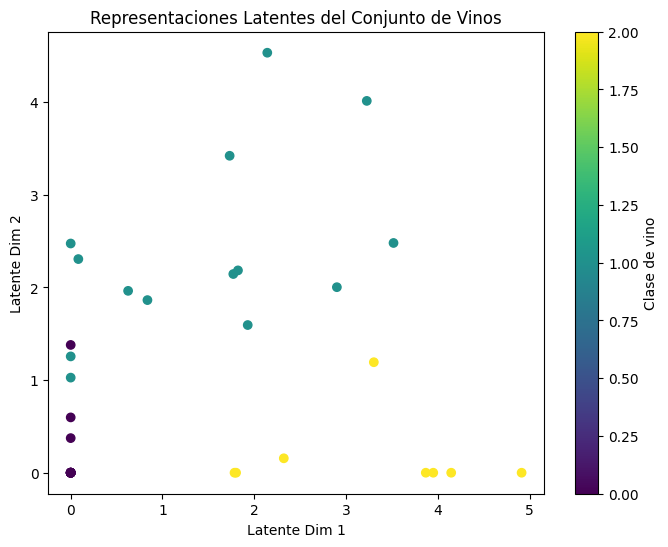

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Cargar el conjunto de datos de vinos
data = load_wine()
X = data.data
y = data.target

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Dimensiones para el autoencoder
input_dim = X_train.shape[1]
encoding_dim = 2  # Reducimos a 2 dimensiones para visualización

# Definir la entrada
input_data = Input(shape=(input_dim,))

# Crear el autoencoder
# Capa de codificación
encoded = Dense(encoding_dim, activation='relu')(input_data)

# Capa de decodificación
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Modelo del autoencoder
autoencoder = Model(input_data, decoded)

# Modelo del codificador para obtener las representaciones latentes
encoder = Model(input_data, encoded)

# Compilar el modelo
autoencoder.compile(optimizer='adam', loss='mse')

# Entrenar el autoencoder
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=16,
                shuffle=True,
                validation_data=(X_test, X_test))

# Obtener las representaciones latentes del conjunto de prueba
latent_representations = encoder.predict(X_test)

# Visualización de las representaciones latentes
plt.figure(figsize=(8, 6))
plt.scatter(latent_representations[:, 0], latent_representations[:, 1], c=y_test, cmap='viridis')
plt.colorbar(label='Clase de vino')
plt.xlabel("Latente Dim 1")
plt.ylabel("Latente Dim 2")
plt.title("Representaciones Latentes del Conjunto de Vinos")
plt.show()